# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #cm --> color map

from sympy import symbols,diff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 -  A simple cost function
### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
#Make Data
x_1 = np.linspace(start=-3, stop = 3, num=500)

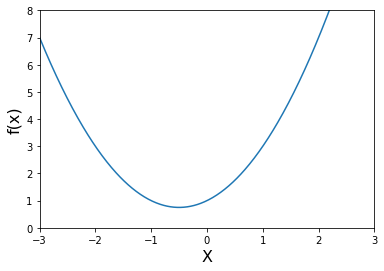

In [4]:
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivatives
Challenge: Create a python function for the derivatives of f(x) called df(x)

In [5]:
def df(x):
    return 2*x + 1

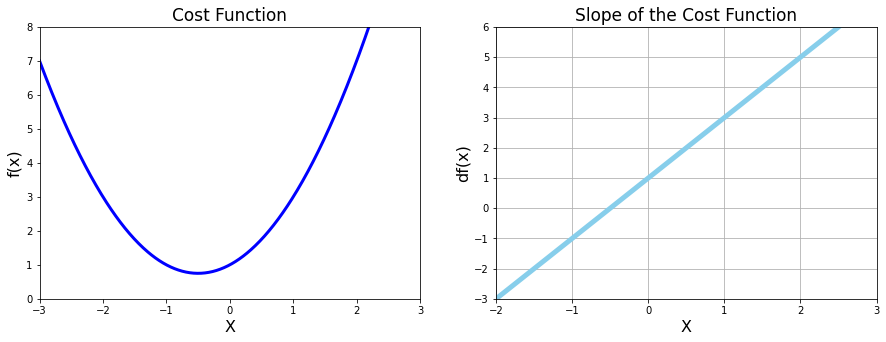

In [6]:
#plot function and derivative side by side
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
# 1st chart: Cost Function
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1,f(x_1), c = 'blue', lw = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1), c = 'skyblue', lw = 5)

plt.show()


## Python Loops & Gradient Descent

In [7]:
#Python For Loop
for n in range(5):
    print('Hello World', n)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [8]:
#Python while loop (be careful not to run an infinite loop)
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter + 1
print('Ready or not, here I come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I come!


In [9]:
#Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]
for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Loop ran this many times',n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is', df(new_x))
print('f(x) value or costt at this point is:', f(new_x))

Loop ran this many times 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is 7.992587079153068e-05
f(x) value or costt at this point is: 0.7500000015970362


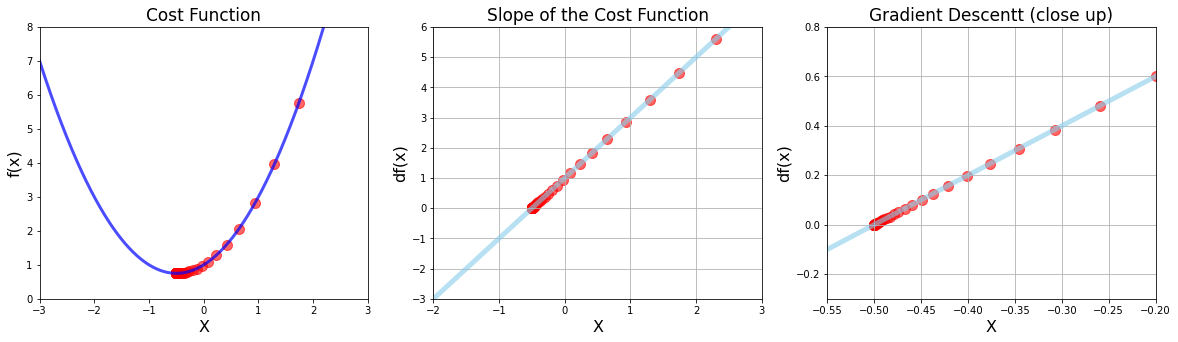

In [10]:
# Superimpose the gradient descent calculations on plot
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
# 1st chart: Cost Function
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1,f(x_1), c = 'blue', lw = 3, alpha = .7)

values = np.array(x_list)
plt.scatter(x_list,f(values), c='r',s=100, alpha = .6)

# 2 Chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1), c = 'skyblue', lw = 5, alpha = .6)

plt.scatter(x_list,slope_list, c='r',s=100, alpha = .6)

# 3 Chart: Derivative (close up)
plt.subplot(1,3,3)
plt.title('Gradient Descentt (close up)', fontsize = 17)
plt.xlim(-0.55,-.2)
plt.ylim(-.3,.8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1), c = 'skyblue', lw = 5, alpha = .6)

plt.scatter(x_list,slope_list, c='r',s=100, alpha = .6)

plt.show()


## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

### $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data
x_2 = np.linspace(-2,2,1000)

# Challenge: Write the g(x) function and the dg(x) function in Python?

def g(x):
    return x**4 - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x

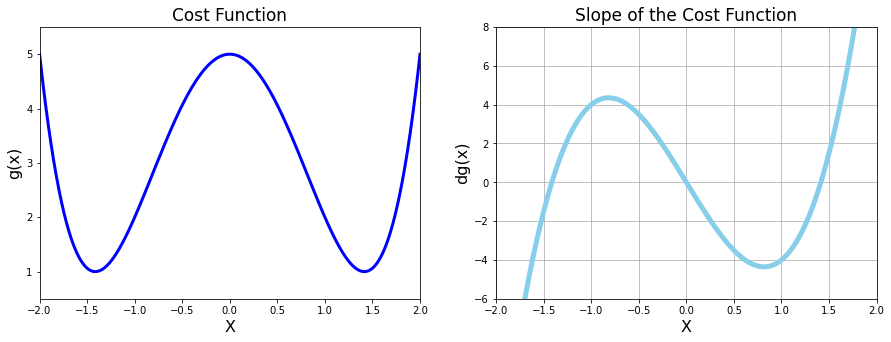

In [12]:
#plot function and derivative side by side
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
# 1st chart: Cost Function
plt.xlim(-2,2)
plt.ylim(.5,5.5)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2,g(x_2), c = 'blue', lw = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.plot(x_2,dg(x_2), c = 'skyblue', lw = 5)

plt.show()


## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [14]:
local_min, list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess = -.5,
                                                multiplier = .01, precision = .0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [15]:
local_min, list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess = -1.8)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4157132143311408
Number of steps: 14


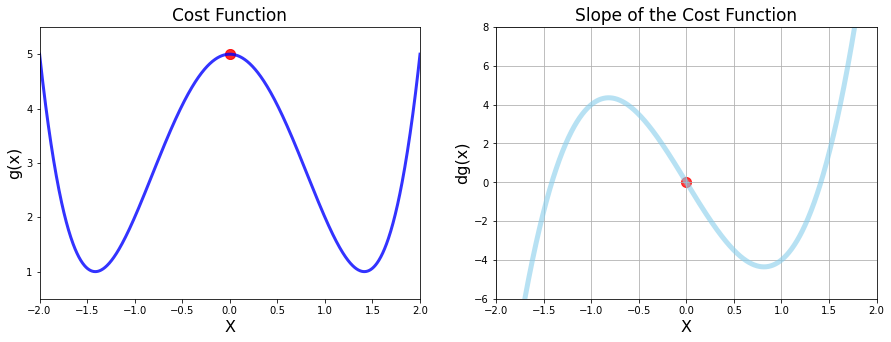

In [16]:
#Calling gradient descent funcction
local_min, list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0)

#plot function and derivative and scatter plot side by side
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
# 1st chart: Cost Function
plt.xlim(-2,2)
plt.ylim(.5,5.5)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2,g(x_2), c = 'blue', lw = 3, alpha = .8)

plt.scatter(list_x,g(np.array(list_x)), c='r', s=100, alpha = .6)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.plot(x_2,dg(x_2), c = 'skyblue', lw = 5, alpha = .6)

plt.scatter(list_x, deriv_list, c='r', s=100, alpha = .5)

plt.show()


## Example 3 - Divergence, Overflow and Python Tuples
### $$h(x) = x^5 - 2x^4 + 2$$

In [17]:
#Make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*(x**4) + 2

def dh(x):
    return 5*(x**4) - 8*(x**3)

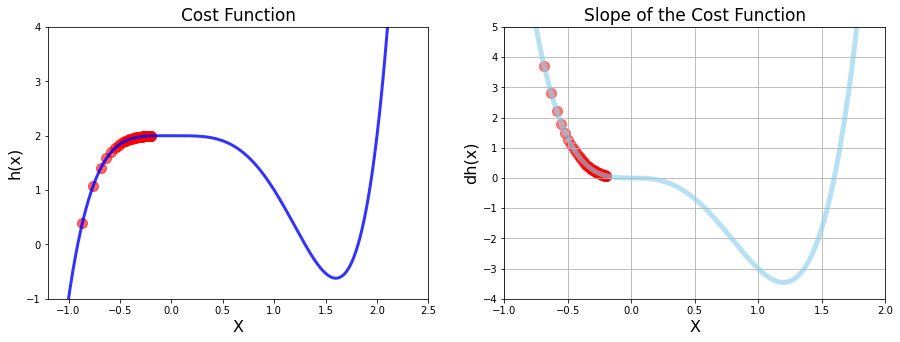

Local mmin occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [18]:
#Calling gradient descent funcction
local_min, list_x,deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 71)

#plot function and derivative and scatter plot side by side
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
# 1st chart: Cost Function
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.plot(x_3,h(x_3), c = 'blue', lw = 3, alpha = .8)

plt.scatter(list_x,h(np.array(list_x)), c='r', s=100, alpha = .6)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(x)', fontsize = 16)
plt.grid()
plt.plot(x_3,dh(x_3), c = 'skyblue', lw = 5, alpha = .6)

plt.scatter(list_x, deriv_list, c='r', s=100, alpha = .5)

plt.show()

print('Local mmin occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

# looking at the graph, if our initial position was at -.2 we would get an overflow error
# -->change the gradientt descent function so that there is a max iteration parameter

In [19]:
import sys
#help(sys)
#sys.version
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [20]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4 , 9, 26, 17

print('I loooooove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) +'th floor')

not_my_address = 1, 'infinite loop', 'los angeles', 90210

tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

main, side, greens = breakfast
print('main course is: ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess = 0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I loooooove  bacon
My hotel has no 4th floor
(42,)
main course is:  bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


## The Learning Rate

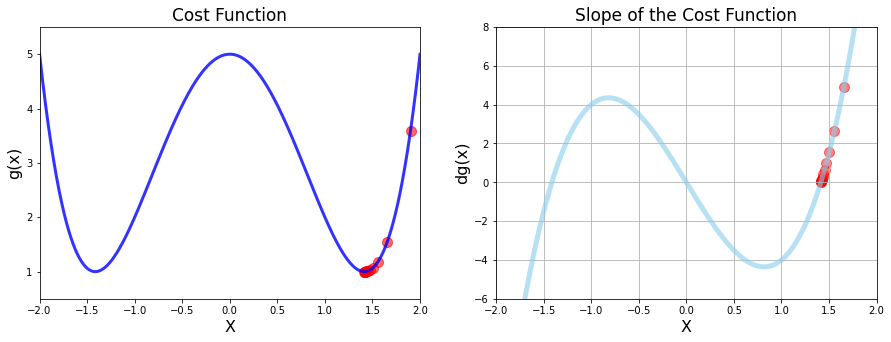

Number of steps is:  14


In [21]:
#Calling gradient descent funcction
local_min, list_x,deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier=0.02, 
                                                max_iter = 500)

#plot function and derivative and scatter plot side by side
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
# 1st chart: Cost Function
plt.xlim(-2,2)
plt.ylim(.5,5.5)
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2,g(x_2), c = 'blue', lw = 3, alpha = .8)

plt.scatter(list_x,g(np.array(list_x)), c='r', s=100, alpha = .6)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.plot(x_2,dg(x_2), c = 'skyblue', lw = 5, alpha = .6)

plt.scatter(list_x, deriv_list, c='r', s=100, alpha = .5)

plt.show()

print('Number of steps is: ', len(list_x))

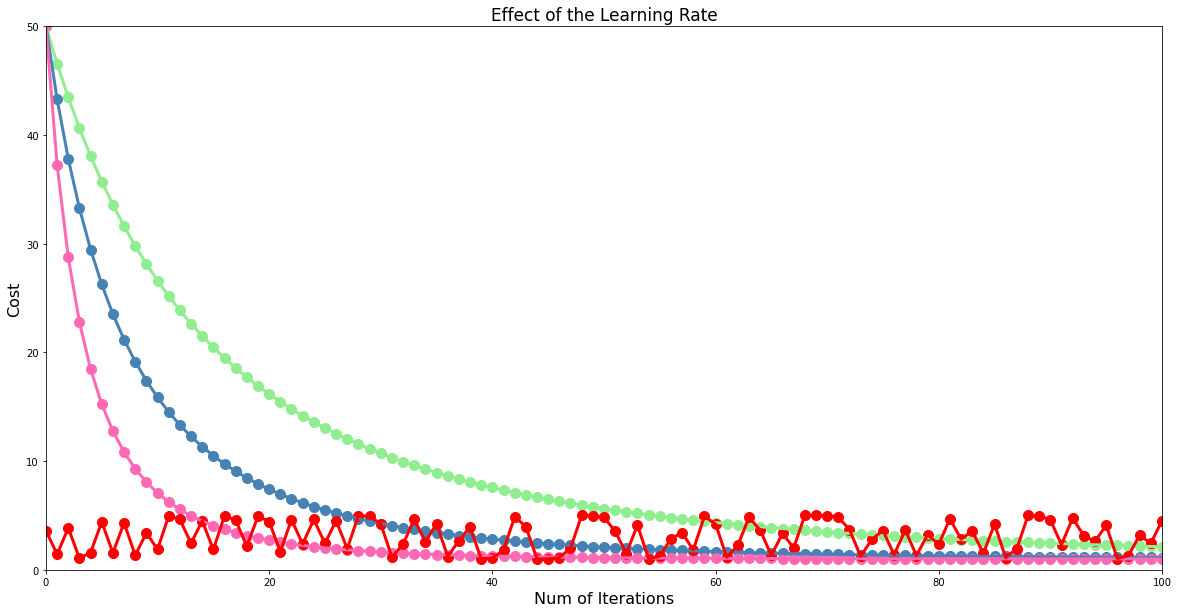

In [22]:
#Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.0005,
                                                precision = 0.0001, max_iter = n)

#Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.001,
                                                precision = 0.0001, max_iter = n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.002,
                                                precision = 0.0001, max_iter = n)

#experiment
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier=0.25,
                                                precision = 0.0001, max_iter = n)

#plotting reudction in cost
plt.figure(figsize = [20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the Learning Rate', fontsize = 17)
plt.xlabel('Num of Iterations', fontsize = 16)
plt.ylabel('Cost', fontsize = 16)

#Values foor our charts
# 1) Y Axis Data: convert the lists too numpy arrays

low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# Plotting low learning rate
plt.plot(iteration_list,g(low_values), c = 'lightgreen', lw = 3)
plt.scatter(iteration_list,g(low_values), c='lightgreen', s=100)

# Plotting mid learning rate
plt.plot(iteration_list,g(mid_values), c = 'steelblue', lw = 3)
plt.scatter(iteration_list,g(mid_values), c='steelblue', s=100)

# Plotting high learning rate
plt.plot(iteration_list,g(high_values), c = 'hotpink', lw = 3)
plt.scatter(iteration_list,g(high_values), c='hotpink', s=100)

# Plotting insane learning rate
plt.plot(iteration_list,g(insane_values), c = 'red', lw = 3)
plt.scatter(iteration_list,g(insane_values), c='red', s=100)

#plot shows the decrease in the cost with each iteration of the loop
#higher the multiplier, the higher the learning rate, meaning that it reaches the minimum faster(converges faster)
#higher multipler only works to a certain extent. If too high, you never converge or get overflow error

In [23]:
# some improvements that can be made to the gradient descent algorithm/function above is that we could change
# the multiplier so that it starts of large and and decreases the closer it gets to convergence

# Bold Driver: another way to change the multiplier would be to increase it by 5% if the error rate is reduced.
#              if the error rate increased in the next iteration after the 5% change, then reset values to the
#              what it was in the previous iteration and change the multiplier accordingly

## Example 4 - Data Viz with 3D Charts

### Minimize $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

In [24]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [25]:
#Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4,y_4 = np.meshgrid(x_4,y_4)
print('Array after meshgrid: ', x_4.shape)



Shape of X array (200,)
Array after meshgrid:  (200, 200)


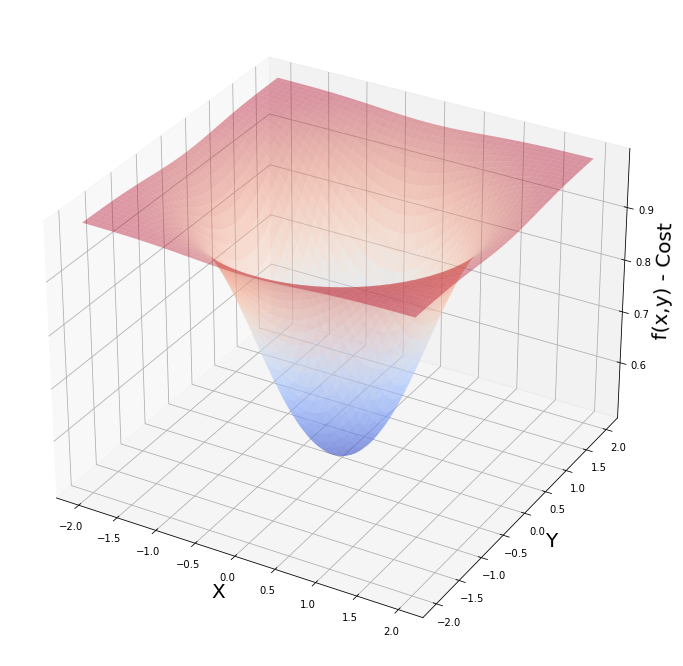

In [26]:
# Generating 3D Plott
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') #gca --> get current axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm , alpha = 0.4)


## Partial Derivatives & Symbolic Computation

### $$\frac{\partial f}{\partial x}= \frac{ 2x \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$
### $$\frac{\partial f}{\partial y}= \frac{ 2y \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [27]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is: ', f(a,b))
print('Partial derivative wrt x is: ', diff(f(a,b),a))
print('Value of f(x,y) at x=1.8, y=1.0 is: ', f(a,b).evalf(subs={a:1.8,b:1.0})) # Python Dictionary
print('Value of df(x,y) wrt x: ',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8, y=1.0 is:  0.990604794032582
Value of df(x,y) wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [28]:
#SymPy is nice, but is more resource intensive. It has to find the diff equations AND evaluate every iteration
#Creating functions would work better since the diff functions would already be known

# Setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [29]:
# Partial derivative functions example 4

def fpx(x,y):
    num = 2*x*np.log(3)*3**(-x**2-y**2)
    den = (3**(-x**2-y**2) + 1)**2
    return num/den

def fpy(x,y):
    num = 2*y*np.log(3)*3**(-x**2-y**2)
    den = (3**(-x**2-y**2) + 1)**2
    return num/den

In [30]:
# Setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [31]:
# Setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2),axis=0)
    values_array = np.concatenate((values_array,params.reshape(1,2)),axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


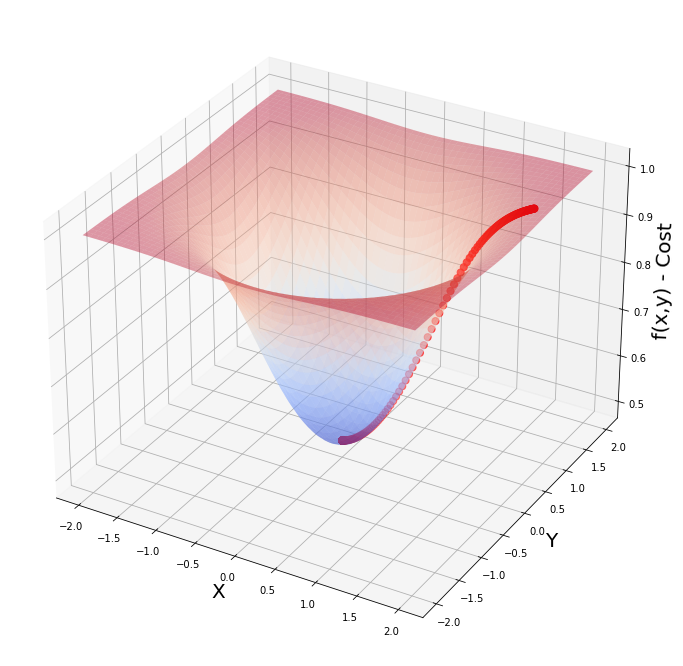

In [32]:
# Generating 3D Plott
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') #gca --> get current axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm , alpha = 0.4)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],values_array[:,1]), s=50,c='red')


In [33]:
# Advance Numpy Arry Practices:

kirk = np.array([['captain','guitar']])
print(kirk.shape)
hs_band = np.array([['black thought','MC'],['questlove','drums']])
print(hs_band.shape)

print('hs_band[0] :', hs_band[0])
print('hs_band[1][0] :', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis = 0)
print(the_roots)

print('Printing nicknames... ',the_roots[:,0])

the_roots = np.append(arr=the_roots, values = [['Malik B','MC']], axis=0)
print('Printing band roles ...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0] : ['black thought' 'MC']
hs_band[1][0] : questlove
[['black thought' 'MC']
 ['questlove' 'drums']
 ['captain' 'guitar']]
Printing nicknames...  ['black thought' 'questlove' 'captain']
Printing band roles ... ['MC' 'drums' 'guitar' 'MC']


## Example 5 - Working with Data & a Real Cost Function

### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$

In [34]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [35]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


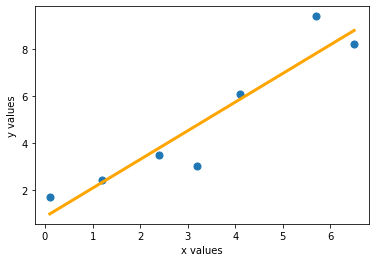

In [36]:
plt.scatter(x_5,y_5, s=50)
plt.plot(x_5,regr.predict(x_5), c='orange', lw = 3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [37]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y,y_hat)
# function and print out the MSE for the y_hat calculated above.
def mse(y, y_hat):
    #mse_calc= (1/len(y_hat))*sum((y_5-y_hat)**2)
    mse_calc = np.average((y_5-y_hat)**2,axis=0)
    return mse_calc

In [39]:
print('Manually calculated MSE is: ', mse(y_5,y_hat))
print('MSE regression using manual calc: ', mean_squared_error(y_5,y_hat))
print('MSE regredsion is: ', mean_squared_error(y_5,regr.predict(x_5)))

Manually calculated MSE is:  [0.94796558]
MSE regression using manual calc:  0.9479655759794577
MSE regredsion is:  0.9479655759794577


## 3D Plot for the MSE Cost Functioon
### Make data for thetas

In [40]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop=3, num=nr_thetas)
th_1 = np.linspace(start = -1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)


### Calc MSE using nested for loops

In [41]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j]) --> [i][j] prints row by row [j][i] prints by columns
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5,y_hat)
        
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [42]:
# Nest loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


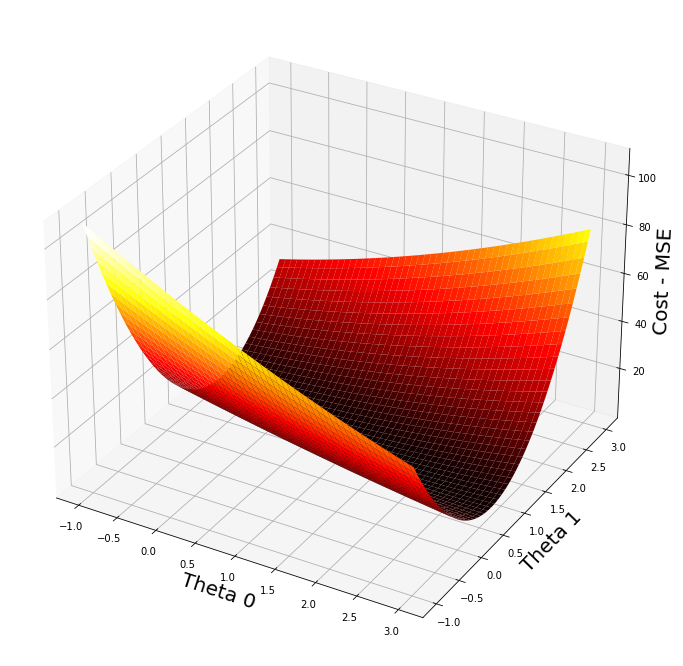

In [43]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0,plot_t1, plot_cost, cmap=cm.hot)

In [44]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]:', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]: 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [45]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    #Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivatives
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    # three different ways to return theta1 and theta0
    #return np.array([theta0_slope[0],theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope,theta1_slope), axis=0)

In [50]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


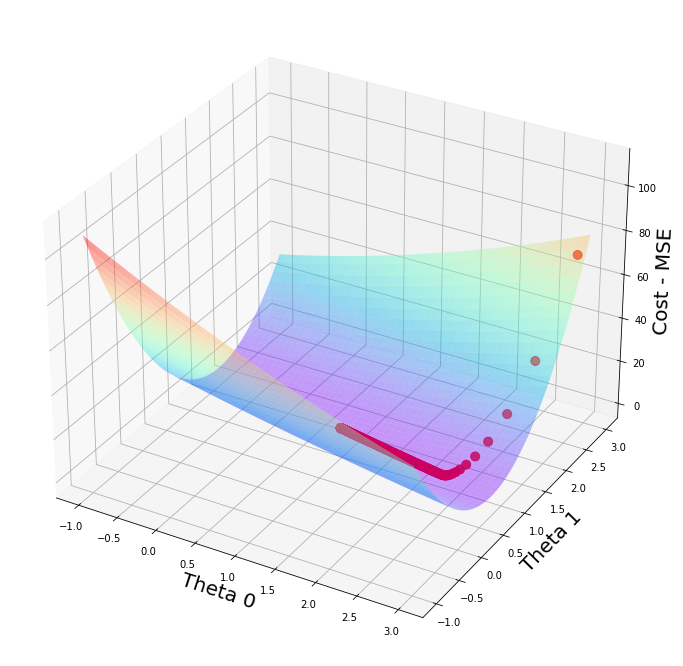

In [55]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:, 1], mse_vals, s=80, c='red')
ax.plot_surface(plot_t0,plot_t1, plot_cost, cmap=cm.rainbow, alpha = .4)